In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

Reading the file into df

In [4]:
df = pd.read_csv('/Users/abhinavchhabra/Downloads/movie.csv')

Checking for null values

In [5]:
print(df.isnull().sum())

text     0
label    0
dtype: int64


Dropping duplicate values

In [6]:
df = df.drop_duplicates(subset= ['text'] , keep = 'first')

Checking if data is balanced

In [7]:
list = [i for i in df['label']]
positive = 0
negative = 0
for i in list:
    if i == 1:
        positive += 1
    if i == 0:
        negative += 1

print(f'Positive : {positive} and Negative : {negative}')

Positive : 19908 and Negative : 19815


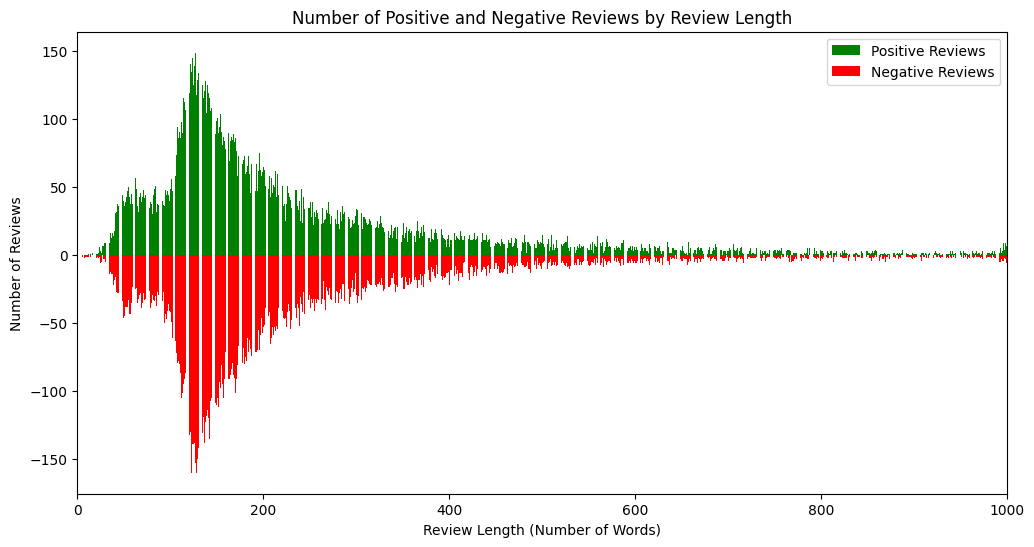

In [8]:
review_length = df['text'].apply(lambda x: len(str(x).split()))
sentiment = df['label'].values
max_len = review_length.max()
positive_counts = np.zeros(max_len + 1, dtype=int)
negative_counts = np.zeros(max_len + 1, dtype=int)

for length, label in zip(review_length, sentiment):
    if label == 1:
        positive_counts[length] += 1
    else:
        negative_counts[length] -= 1
lengths = np.arange(max_len + 1)

plt.figure(figsize=(12,6))
plt.bar(lengths, positive_counts, alpha=1, label='Positive Reviews', color='g')
plt.bar(lengths, negative_counts, alpha=1, label='Negative Reviews', color='r')

plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Number of Reviews')
plt.title('Number of Positive and Negative Reviews by Review Length')
plt.legend()
plt.xlim(0,1000)
plt.show()

Removing stop words

In [9]:
stop_words = set(stopwords.words('english'))
def clean_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [w.lower() for w in tokens if w.lower() not in stop_words]
    return ' '.join(filtered_tokens)

df['text'] = df['text'].apply(clean_text)

Removing punctuations

In [10]:
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    cleaned_text = ' '.join(tokens)
    return cleaned_text
df['text'] = df['text'].apply(remove_punctuation)

Stemming of the data

In [11]:
def stemmers(text):
    stem = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [stem.stem(w) for w in words]
    return ' '.join(stemmed_words)
df['text'] = df['text'].apply(stemmers)

Lemmatisation of the data

In [12]:
def lemmatized(text):
    lem = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_words = [lem.lemmatize(w) for w in words]
    return ' '.join(lemmatized_words)
df['text'] = df['text'].apply(lemmatized)

Libraries for vectorising the data

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

Splitting the data into the text and labels

In [14]:
Sentences = df['text']
Labels = df['label']

Bag of words : 

In [21]:
#Bag of Words : 
cv = CountVectorizer()
BagOfWords = cv.fit_transform(Sentences)

TF-IDF:

In [23]:
#TF-IDF:
tf = TfidfVectorizer()
tf_idf = tf.fit_transform(Sentences)


Word2Vec:

In [17]:
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in Sentences]
model = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=1, epochs=10)

def get_sentence_vector(model, sentence):
    tokens = word_tokenize(sentence.lower())
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

word2vec = np.array([get_sentence_vector(model, sentence) for sentence in Sentences])

Logistic Regression : 

In [ ]:
from sklearn.linear_model import LogisticRegression
#Bag Of Words : 
X_train,X_test,Labels_train,Labels_test = train_test_split(BagOfWords,Labels,test_size=0.2,random_state=20)


model = LogisticRegression(max_iter=1000)

model.fit(X_train,Labels_train)

print(f'Model Score of Bag of words : {model.score(X_test,Labels_test)}')

#TF-IDF : 
X_train,X_test,Labels_train,Labels_test = train_test_split(tf_idf,Labels,test_size=0.2,random_state=20)


model = LogisticRegression(max_iter=1000)

model.fit(X_train,Labels_train)

print(f'Model score for TF-IDF : {model.score(X_test,Labels_test)}')

#Word2Vec : 
X_train,X_test,Labels_train,Labels_test = train_test_split(word2vec,Labels,test_size=0.2,random_state=20)


model = LogisticRegression(max_iter=1000)

model.fit(X_train,Labels_train)

print(f'Model score for Word2Vec : {model.score(X_test,Labels_test)}')


Model Score of Bag of words : 0.8782882315921964
Model score for TF-IDF : 0.8907488986784141
Model score for Word2Vec : 0.8649465072372562


Naive Bayes Classifier:

In [29]:
#Naive Bayes:
from sklearn.naive_bayes import BernoulliNB
#Bag Of Words : 
X_train,X_test,Labels_train,Labels_test = train_test_split(BagOfWords,Labels,test_size=0.2,random_state=20)
model = BernoulliNB()
model.fit(X_train,Labels_train)
print(f'Model Score of Bag of words : {model.score(X_test,Labels_test)}')

#TF-IDF : 
X_train,X_test,Labels_train,Labels_test = train_test_split(tf_idf,Labels,test_size=0.2,random_state=20)
model = BernoulliNB()
model.fit(X_train,Labels_train)
print(f'Model Score of TF-IDF : {model.score(X_test,Labels_test)}')

#Word2Vec : 
X_train,X_test,Labels_train,Labels_test = train_test_split(word2vec,Labels,test_size=0.2,random_state=20)
model = BernoulliNB()
model.fit(X_train,Labels_train)
print(f'Model Score of Word2Vec : {model.score(X_test,Labels_test)}')

Model Score of Bag of words : 0.8483322844556325
Model Score of TF-IDF : 0.8483322844556325
Model Score of Word2Vec : 0.7380742605412209


SVMs : 

In [34]:
#SVMs:
from sklearn import svm

#Bag Of Words : 
X_train,X_test,Labels_train,Labels_test = train_test_split(BagOfWords,Labels,test_size=0.2,random_state=20)
model = svm.LinearSVC(max_iter=3000)
model.fit(X_train,Labels_train)

print(f'Model Score of Bag of words : {model.score(X_test,Labels_test)}')

#TF-IDF : 
X_train,X_test,Labels_train,Labels_test = train_test_split(tf_idf,Labels,test_size=0.2,random_state=20)
model = svm.LinearSVC(max_iter=3000)
model.fit(X_train,Labels_train)

print(f'Model Score of TF-IDF : {model.score(X_test,Labels_test)}')

#Word2Vec : 
X_train,X_test,Labels_train,Labels_test = train_test_split(word2vec,Labels,test_size=0.2,random_state=20)
model = svm.LinearSVC(max_iter=3000)
model.fit(X_train,Labels_train)

print(f'Model Score of Word2Vec : {model.score(X_test,Labels_test)}')




/Users/abhinavchhabra/penv/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Score of Bag of words : 0.8539962240402769
Model Score of TF-IDF : 0.8897419760855885
Model Score of Word2Vec : 0.8645689112649465


Random Forest Regressor

In [36]:
#Random Forest : 
from sklearn.ensemble import RandomForestClassifier

#Bag of Words :
X_train,X_test,Labels_train,Labels_test = train_test_split(BagOfWords,Labels,test_size=0.2,random_state=20)
model = RandomForestClassifier()
model.fit(X_train,Labels_train)
print(f'Model Score of Bag of words : {model.score(X_test,Labels_test)}')

#TF-IDF :
X_train,X_test,Labels_train,Labels_test = train_test_split(tf_idf,Labels,test_size=0.2,random_state=20)
model = RandomForestClassifier()
model.fit(X_train,Labels_train)
print(f'Model Score of TF-IDF : {model.score(X_test,Labels_test)}')

#Word2Vec:
X_train,X_test,Labels_train,Labels_test = train_test_split(word2vec,Labels,test_size=0.2,random_state=20)
model = RandomForestClassifier()
model.fit(X_train,Labels_train)
print(f'Model Score of Word2Vec : {model.score(X_test,Labels_test)}')



Model Score of Bag of words : 0.8499685336689742
Model Score of TF-IDF : 0.8436752674638137
Model Score of Word2Vec : 0.8324732536186281


Checking shape of Bag of Words, TF-IDF and Word2Vec : 

In [55]:
print('Number Of Features in Bag Of Words : ' , BagOfWords.shape[1])
print('Number Of Features in TF-IDF : ' , tf_idf.shape[1])
print('Number Of Features in Word2Vec : ' , word2vec.shape[1])

Number Of Features in Bag Of Words :  64615
Number Of Features in TF-IDF :  64615
Number Of Features in Word2Vec :  100


Since the number of features of Bag of Words and TF-IDF are so high neural networks is not very efficient with respect to time

Neural Network :

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
class Model(nn.Module):
    def __init__(self,input_shape):
        super(Model,self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(input_shape,256),nn.ReLU())
        self.layer2 = nn.Sequential(nn.Linear(256,256),nn.ReLU())
        self.layer3 = nn.Sequential(nn.Linear(256,2))
    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [51]:
#Word2Vec: 


X_train,X_test,Labels_train,Labels_test = train_test_split(word2vec,Labels,test_size=0.2,random_state=20)
Model_Word2Vec = Model(X_train.shape[1])
optimizer = optim.AdamW(Model_Word2Vec.parameters(),lr = 0.001)
criterion = nn.CrossEntropyLoss()
for epoch in range(2):
    for x,y in zip(X_train,Labels_train):
        x_tensor = torch.tensor(x, dtype=torch.float32).squeeze(0)
        y_tensor = torch.tensor([y], dtype=torch.long)

        y_pred = Model_Word2Vec(x_tensor)
        loss = criterion(y_pred.unsqueeze(0), y_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

correct = 0
total = 0
for x,y in zip(X_test,Labels_test):
    x_tensor = torch.tensor(np.array(x), dtype=torch.float32).squeeze(0)
    y_pred = Model_Word2Vec(x_tensor)
    predicted = torch.argmax(y_pred).item()
    if predicted == y:
        correct += 1
    total += 1

print(f'Accuracy of Word2Vec : {correct/total}')

Accuracy of Word2Vec : 0.863687853996224


So, the best score achieved was for logistic regression for TF-IDF embedding calculating the related metrics for it : 

Evaluation Metrics : 

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, roc_auc_score, 
                            f1_score, confusion_matrix, 
                            classification_report)
X_train,X_test,Labels_train,Labels_test = train_test_split(tf_idf,Labels,test_size=0.2,random_state=20)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Labels_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Logistic Regression Evaluation : " )

accuracy = accuracy_score(Labels_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

roc_auc = roc_auc_score(Labels_test, y_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

f1 = f1_score(Labels_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

cm = confusion_matrix(Labels_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# print("\nClassification Report:")
# print(classification_report(Labels_test, y_pred))


Logistic Regression Evaluation : 
Accuracy: 0.8907
ROC-AUC: 0.9581
F1 Score: 0.8907

Confusion Matrix:
[[3378  521]
 [ 347 3699]]
